In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# nakon što stavimo datoteke na Git uvijek čitati u ovomo obliku! (štedi vrijeme)
import time
start = time.time()
# df = pd.read_hdf('./data/raw/training_dataset.h5', 'df')
df = pd.read_hdf('output_bez_kvartala.h5', 'df')
end = time.time()
print(end - start)

# nakon što napravimo promjene kako treba, exportat ću ih u novu datoteku pomoću naredbe
# df.to_hdf('training_dataset2.h5', key='df')

17.460086584091187


In [6]:
# duplikati = df.drop_duplicates(['KLIJENT_ID', 'OZNAKA_PARTIJE', 'DATUM_OTVARANJA'])
raskidi = df[df['PRIJEVREMENI_RASKID']=='Y']
neraskidi = df[df['PRIJEVREMENI_RASKID']=='N']
print(raskidi.shape, neraskidi.shape)
print(raskidi.shape[0]/(raskidi.shape[0]+neraskidi.shape[0]))

(194942, 19) (449945, 19)
0.30228861800594525


In [7]:
df.shape

(644887, 19)

<h2> Odabir značajki </h2>

<h2> Oversampling </h2>

In [19]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# Separate input features and target
y = df['PRIJEVREMENI_RASKID']
X = df.drop('PRIJEVREMENI_RASKID', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
ne_raskidi = X[X['PRIJEVREMENI_RASKID']=='N']
raskidi = X[X['PRIJEVREMENI_RASKID']=='Y']

# upsample minority
raskidi_upsampled = resample(raskidi,
                          replace=True, # sample with replacement
                          n_samples=len(ne_raskidi), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([neraskidi, raskidi_upsampled])

# check new class counts
upsampled['PRIJEVREMENI_RASKID'].value_counts()

C:\Users\Dorotea\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



N    449945
Y    337453
Name: PRIJEVREMENI_RASKID, dtype: int64

In [21]:
df = upsampled
df.shape

(787398, 19)

<h1> Makroekonomski indikatori </h1

In [5]:
# Čitam tablicu ekonomskih indikatora
# econ = pd.read_excel('./data/external/ekonomski_indikatori.xlsx')
econ = pd.read_excel('./data/external/ekonomski_indikatori.xlsx')

econ.dropna(thresh=int(econ.shape[1] * .9), axis = 0, inplace = True)
column_names = econ.columns
# Drop unwanted columns
econ.drop(column_names[0], inplace=True, axis=1)

econ.rename(columns={'Unnamed: 2': '2000', 'Unnamed: 3': '2001', 
                   'Unnamed: 4': '2002', 'Unnamed: 5': '2003', 
                   'Unnamed: 6': '2004', 'Unnamed: 7': '2005',
                  'Unnamed: 8': '2006', 'Unnamed: 9': '2007', 
                  'Unnamed: 10': '2008', 'Unnamed: 11': '2009',
                  'Unnamed: 12': '2010', 'Unnamed: 13': '2011',
                  'Unnamed: 14': '2012', 'Unnamed: 15': '2013',
                  'Unnamed: 16': '2014', 'Unnamed: 17': '2015',
                  'Unnamed: 18': '2016', 'Unnamed: 19': '2017',
                  'Unnamed: 20': '2018'}, inplace=True)

econ.drop([4], axis = 0, inplace = True)

econ2 = econ.transpose(copy = True)
new_column_names = econ2.iloc[0,:]
econ2.columns = new_column_names

econ2.reset_index()


General information on Croatia,index,nan,Population (million) a,"GDP (million HRK, current prices) b","GDP (million EUR, current prices)",GDP per capita (in EUR),"GDP - year-on-year rate of growth (in %, constant prices)",Average CPI year-on-year inflation rate,Current account balance (million EUR) c,Current account balance (as of % GDP),...,"Gross international reserves (in terms of months of imports of goods and services, end of year)",Exchange rate on 31 December (HRK : 1 EUR),Exchange rate on 31 December (HRK : 1 USD),Average exchange rate (HRK : 1 EUR),Average exchange rate (HRK : 1 USD),Consolidated general government net lending (+)/borrowing (-) (million HRK) e,Consolidated general government net lending (+)/borrowing (-) (as % of GDP) e,General government debt (as % of GDP) e,"Unemployment rate (ILO, persons above 15 years of age) f","Employment rate (ILO, persons above 15 years of age) f"
0,General information on Croatia,NaN,Population (million) a,"GDP (million HRK, current prices) b","GDP (million EUR, current prices)",GDP per capita (in EUR),"GDP - year-on-year rate of growth (in %, const...",Average CPI year-on-year inflation rate,Current account balance (million EUR) c,Current account balance (as of % GDP),...,Gross international reserves (in terms of mont...,Exchange rate on 31 December (HRK : 1 EUR),Exchange rate on 31 December (HRK : 1 USD),Average exchange rate (HRK : 1 EUR),Average exchange rate (HRK : 1 USD),Consolidated general government net lending (+...,Consolidated general government net lending (+...,General government debt (as % of GDP) e,"Unemployment rate (ILO, persons above 15 years...","Employment rate (ILO, persons above 15 years o..."
1,2000,2000,4.426,180241,23610.7,5334.56,3.7675,4.6,-516.727,-2.18852,...,4.85331,7.59833,8.15534,7.63385,8.28737,....,....,35.4986,16.05,42.6
2,2001,2001,4.30549,194271,26003.3,6039.56,3.45241,3.8,-758.857,-2.91831,...,5.81721,7.37003,8.35604,7.47101,8.33915,....,....,36.4623,15.8,41.8
3,2002,2002,4.30538,211500,28554.2,6632.21,5.25336,1.7,-2016.88,-7.06332,...,5.20306,7.44229,7.14574,7.40698,7.87249,-7365.19,-3.48235,36.6016,14.8,43.3
4,2003,2003,4.30572,232444,30729.3,7136.85,5.58119,1.8,-1811.73,-5.89579,...,5.52068,7.64691,6.11851,7.56425,6.70445,-10863.8,-4.67371,38.0835,14.25,43.1
5,2004,2004,4.31086,250565,33427.9,7754.34,3.91456,2.1,-1355.35,-4.05455,...,5.0642,7.67123,5.63688,7.49568,6.03122,-13038.5,-5.20365,40.2681,13.8,43.5
6,2005,2005,4.31249,269779,36456.5,8453.7,4.10956,3.3,-1892.06,-5.18991,...,5.37051,7.37563,6.23363,7.40005,5.94996,-10413.5,-3.86001,41.1553,12.7,43.3
7,2006,2006,4.31353,294150,40168.8,9312.29,4.86782,3.2,-2612.7,-6.5043,...,5.60497,7.34508,5.5784,7.32285,5.83917,-9971.92,-3.39008,38.6436,11.2,43.6
8,2007,2007,4.31197,322464,43956.2,10194,5.28365,2.9,-3138.26,-7.13952,...,5.48831,7.32513,4.98546,7.33602,5.36599,-7880.62,-2.44388,37.2272,9.9,47.6
9,2008,2008,4.3098,347750,48143.6,11170.7,2.03646,6.1,-4226.91,-8.7798,...,4.88824,7.32442,5.1555,7.22318,4.93442,-9604.64,-2.76194,38.9616,8.5,48.6


In [6]:
indikatori = econ2.copy()
indikatori = indikatori.iloc[1:, :]
indikatori['GODINE']=range(2000,2019)
drop_col = [0,1,2, 3,7,11, 13, 14, 15, 16, 17, 18, 24]
indikatori.columns[drop_col].values
indikatori.drop(indikatori.columns[drop_col].values, axis = 1, inplace = True)

In [7]:
df['GODINA_OTVARANJA'] = df['DATUM_OTVARANJA'].dt.year

In [8]:
import time
start = time.time()
df_merged = pd.merge(df, indikatori, left_on=['GODINA_OTVARANJA'], right_on = ['GODINE'], how = 'left')
end = time.time()
print(end-start)
df_merged.rename(columns={'GDP per capita (in EUR)  ': 'ind1-poc', 'GDP - year-on-year rate of growth (in %, constant prices) ': 'ind2-poc', 
                   'Average CPI year-on-year inflation rate ': 'ind3-poc', 'Current account balance (as of % GDP) ': 'ind4-poc', 
                   'Exports of goods and services (as of % GDP) ': 'ind5-poc', 'Imports of goods and services (as of % GDP) ': 'ind6-poc',
                  'External debt (as of % GDP) ': 'ind7-poc', 'Average exchange rate (HRK : 1 EUR) ': 'ind8-poc', 'Average exchange rate (HRK : 1 USD) ': 'ind9-poc',
                  'Consolidated general government net lending (+)/borrowing (-) (as % of GDP) e' : 'ind10-poc', 'General government debt (as % of GDP) e': 'ind11-poc',
                  'Employment rate (ILO, persons above 15 years of age) f': 'ind12-poc'}, inplace=True)

del df_merged['Consolidated general government net lending (+)/borrowing (-) (million HRK) e']
del df_merged['GODINE']

1.9101972579956055


In [9]:
df['PLANIRANA_DULJINA_KREDITA'] =  (df['PLANIRANI_DATUM_ZATVARANJA']-df['DATUM_OTVARANJA']).dt.days

In [10]:
df_merged['PLANIRANA_DULJINA_KREDITA'] =  (df_merged['PLANIRANI_DATUM_ZATVARANJA']-df_merged['DATUM_OTVARANJA']).dt.days

In [11]:
df_merged.shape

(644887, 31)

In [12]:
mydateparser = lambda c: pd.to_datetime(c, format='%d.%m.%Y', errors='coerce')
test = pd.read_excel('eval_dataset_nan.xlsx')#parse_dates=['DATUM_OTVARANJA', 'PLANIRANI_DATUM_ZATVARANJA'], date_parser=mydateparser
test['DATUM_OTVARANJA'] = pd.to_datetime(test['DATUM_OTVARANJA'], format='%d.%m.%Y')

In [13]:
del test['instance_id']
del test['OZNAKA_PARTIJE']
del df_merged['OZNAKA_PARTIJE']

In [14]:
test['GODINA_OTVARANJA'] = test['DATUM_OTVARANJA'].dt.year

In [15]:
test['PLANIRANA_DULJINA_KREDITA'] = (test['PLANIRANI_DATUM_ZATVARANJA']-test['DATUM_OTVARANJA']).dt.days

In [16]:
del test['DATUM_OTVARANJA']

In [17]:
del test['PLANIRANI_DATUM_ZATVARANJA']
del df_merged['DATUM_ZATVARANJA']

In [18]:
test_merged = pd.merge(test,indikatori,left_on=['GODINA_OTVARANJA'], right_on=['GODINE'], how='left')
test_merged.rename(columns={'GDP per capita (in EUR)  ': 'ind1-poc', 'GDP - year-on-year rate of growth (in %, constant prices) ': 'ind2-poc', 
                   'Average CPI year-on-year inflation rate ': 'ind3-poc', 'Current account balance (as of % GDP) ': 'ind4-poc', 
                   'Exports of goods and services (as of % GDP) ': 'ind5-poc', 'Imports of goods and services (as of % GDP) ': 'ind6-poc',
                  'External debt (as of % GDP) ': 'ind7-poc', 'Average exchange rate (HRK : 1 EUR) ': 'ind8-poc', 'Average exchange rate (HRK : 1 USD) ': 'ind9-poc',
                  'Consolidated general government net lending (+)/borrowing (-) (as % of GDP) e' : 'ind10-poc', 'General government debt (as % of GDP) e': 'ind11-poc',
                  'Employment rate (ILO, persons above 15 years of age) f': 'ind12-poc'}, inplace=True)

In [19]:
del test_merged['Consolidated general government net lending (+)/borrowing (-) (million HRK) e']

In [20]:
test_merged

,KLIJENT_ID,UGOVORENI_IZNOS,VALUTA,VRSTA_KLIJENTA,PROIZVOD,VRSTA_PROIZVODA,VISINA_KAMATE,TIP_KAMATE,STAROST,PRIJEVREMENI_RASKID,...,ind4-poc,ind5-poc,ind6-poc,ind7-poc,ind8-poc,ind9-poc,ind10-poc,ind11-poc,ind12-poc,GODINE
0,1049000,273555.01,2,1410,TM0109,L,3.60,A,64,NaN,...,-0.114238,41.6252,41.1878,102.929,7.51734,5.85086,-5.2655,69.4446,43.2,2012.0
1,481302,50970.78,2,1410,TM0109,L,0.20,A,56,NaN,...,2.58553,48.8269,45.9917,89.2949,7.52938,6.80372,-0.932065,80.1886,44.5847,2016.0
2,838192,8969.36,2,1410,TM0109,L,0.02,A,52,NaN,...,-,-,-,75.0706,7.41411,6.27841,-,-,-,2018.0
3,174575,16142.48,2,1410,TM0109,L,2.30,C,76,NaN,...,-0.114238,41.6252,41.1878,102.929,7.51734,5.85086,-5.2655,69.4446,43.2,2012.0
4,14884,45315.31,2,1410,TM0109,L,3.30,C,53,NaN,...,-0.698502,40.415,40.8333,103.44,7.4342,5.34351,-7.86303,63.8248,44.8,2011.0
5,1348702,40000.00,1,1410,TM0109,L,1.50,A,35,NaN,...,-,-,-,75.0706,7.41411,6.27841,-,-,-,2018.0
6,764915,119043.94,2,1410,TM0109,L,2.00,A,50,NaN,...,0.946094,42.8402,42.4593,104.554,7.57355,5.70588,-5.2795,80.3602,42.075,2013.0
7,367476,103650.71,2,1410,TM0109,L,5.15,A,35,NaN,...,-1.0676,37.6476,37.982,103.841,7.28623,5.50002,-6.27526,57.3055,46.5,2010.0
8,234350,185000.00,1,1550,TM0109,L,1.30,A,46,NaN,...,4.04705,51.27,49.1009,81.7513,7.4601,6.6224,0.863547,77.4848,45.8246,2017.0
9,888283,54123.73,1,1410,TM0109,L,0.20,A,38,NaN,...,-,-,-,75.0706,7.41411,6.27841,-,-,-,2018.0


In [21]:
del test_merged['GODINE']

<h2> Odabir značajki </h2>

In [24]:
df_merged.columns

Index(['DATUM_IZVJESTAVANJA', 'KLIJENT_ID', 'DATUM_OTVARANJA',
       'PLANIRANI_DATUM_ZATVARANJA', 'UGOVORENI_IZNOS',
       'STANJE_NA_KRAJU_PRETH_KVARTALA', 'STANJE_NA_KRAJU_KVARTALA', 'VALUTA',
       'VRSTA_KLIJENTA', 'PROIZVOD', 'VRSTA_PROIZVODA', 'VISINA_KAMATE',
       'TIP_KAMATE', 'STAROST', 'PRIJEVREMENI_RASKID', 'GODINA_OTVARANJA',
       'PLANIRANA_DULJINA_KREDITA', 'ind1-poc', 'ind2-poc', 'ind3-poc',
       'ind4-poc', 'ind5-poc', 'ind6-poc', 'ind7-poc', 'ind8-poc', 'ind9-poc',
       'ind10-poc', 'ind11-poc', 'ind12-poc'],
      dtype='object')

In [26]:
del df_merged['DATUM_IZVJESTAVANJA']
del df_merged['DATUM_OTVARANJA']
del df_merged['PLANIRANI_DATUM_ZATVARANJA']
del df_merged['STANJE_NA_KRAJU_PRETH_KVARTALA']
del df_merged['STANJE_NA_KRAJU_KVARTALA']

In [27]:
df_merged.columns

Index(['KLIJENT_ID', 'UGOVORENI_IZNOS', 'VALUTA', 'VRSTA_KLIJENTA', 'PROIZVOD',
       'VRSTA_PROIZVODA', 'VISINA_KAMATE', 'TIP_KAMATE', 'STAROST',
       'PRIJEVREMENI_RASKID', 'GODINA_OTVARANJA', 'PLANIRANA_DULJINA_KREDITA',
       'ind1-poc', 'ind2-poc', 'ind3-poc', 'ind4-poc', 'ind5-poc', 'ind6-poc',
       'ind7-poc', 'ind8-poc', 'ind9-poc', 'ind10-poc', 'ind11-poc',
       'ind12-poc'],
      dtype='object')

In [25]:
test_merged.columns

Index(['KLIJENT_ID', 'UGOVORENI_IZNOS', 'VALUTA', 'VRSTA_KLIJENTA', 'PROIZVOD',
       'VRSTA_PROIZVODA', 'VISINA_KAMATE', 'TIP_KAMATE', 'STAROST',
       'PRIJEVREMENI_RASKID', 'GODINA_OTVARANJA', 'PLANIRANA_DULJINA_KREDITA',
       'ind1-poc', 'ind2-poc', 'ind3-poc', 'ind4-poc', 'ind5-poc', 'ind6-poc',
       'ind7-poc', 'ind8-poc', 'ind9-poc', 'ind10-poc', 'ind11-poc',
       'ind12-poc'],
      dtype='object')

In [72]:
## ENKODIRANJE
X = df_merged[['KLIJENT_ID', 'UGOVORENI_IZNOS', 'VALUTA', 'VRSTA_KLIJENTA', 'PROIZVOD',
       'VRSTA_PROIZVODA', 'TIP_KAMATE', 'STAROST',
       'VISINA_KAMATE', 'PLANIRANA_DULJINA_KREDITA', 'GODINA_OTVARANJA',
       'ind1-poc', 'ind2-poc', 'ind3-poc', 'ind4-poc', 'ind5-poc', 'ind6-poc',
       'ind7-poc', 'ind8-poc', 'ind9-poc', 'ind10-poc', 'ind11-poc',
       'ind12-poc', 'PRIJEVREMENI_RASKID']]


In [73]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

dumm = pd.get_dummies(X['VRSTA_KLIJENTA'])
combined = pd.concat([X,dumm],axis = 1)
combined['VRSTA_KLIJENTA_CODE'] = lb_make.fit_transform(combined['VRSTA_KLIJENTA'])
del combined['VRSTA_KLIJENTA']
combined.drop(dumm.columns, axis = 1, inplace = True)


dumm = pd.get_dummies(combined['VALUTA'])
combined = pd.concat([combined,dumm],axis = 1)
combined['VALUTA_CODE'] = lb_make.fit_transform(combined['VALUTA'])
del combined['VALUTA']
combined.drop(dumm.columns, axis = 1, inplace = True)


dumm = pd.get_dummies(combined['TIP_KAMATE'])
combined = pd.concat([combined,dumm],axis = 1)
combined['TIP_KAMATE_CODE'] = lb_make.fit_transform(combined['TIP_KAMATE'])
del combined['TIP_KAMATE']
combined.drop(dumm.columns, axis = 1, inplace = True)

dumm = pd.get_dummies(combined['PROIZVOD'])
combined = pd.concat([combined,dumm],axis = 1)
combined['PROIZVOD_CODE'] = lb_make.fit_transform(combined['PROIZVOD'])
del combined['PROIZVOD']
combined.drop(dumm.columns, axis = 1, inplace = True)

dumm = pd.get_dummies(combined['GODINA_OTVARANJA'])
combined = pd.concat([combined,dumm],axis = 1)
combined['GODINA_OTVARANJA_CODE'] = lb_make.fit_transform(combined['GODINA_OTVARANJA'])
del combined['GODINA_OTVARANJA']
combined.drop(dumm.columns, axis = 1, inplace = True)

dumm = pd.get_dummies(X['VRSTA_PROIZVODA'])
combined = pd.concat([combined,dumm],axis = 1)
combined['VRSTA_PROIZVODA_CODE'] = lb_make.fit_transform(combined['VRSTA_PROIZVODA'])
del combined['VRSTA_PROIZVODA']
combined.drop(dumm.columns, axis = 1, inplace = True)

dumm = pd.get_dummies(X['PRIJEVREMENI_RASKID'])
combined = pd.concat([combined,dumm],axis = 1)
combined['PRIJEVREMENI_RASKID_CODE'] = lb_make.fit_transform(combined['PRIJEVREMENI_RASKID'])
del combined['PRIJEVREMENI_RASKID']
combined.drop(dumm.columns, axis = 1, inplace = True)

# Memory Error
#dumm = pd.get_dummies(X['KLIJENT_ID'])
#combined = pd.concat([X,dumm],axis = 1)
#combined['KLIJENT_ID_CODE'] = lb_make.fit_transform(combined['KLIJENT_ID'])
#del combined['KLIJENT_ID']
#combined.drop(dumm.columns, axis = 1, inplace = True)



In [74]:
combined.columns

Index(['KLIJENT_ID', 'UGOVORENI_IZNOS', 'STAROST', 'VISINA_KAMATE',
       'PLANIRANA_DULJINA_KREDITA', 'ind1-poc', 'ind2-poc', 'ind3-poc',
       'ind4-poc', 'ind5-poc', 'ind6-poc', 'ind7-poc', 'ind8-poc', 'ind9-poc',
       'ind10-poc', 'ind11-poc', 'ind12-poc', 'VRSTA_KLIJENTA_CODE',
       'VALUTA_CODE', 'TIP_KAMATE_CODE', 'PROIZVOD_CODE',
       'GODINA_OTVARANJA_CODE', 'VRSTA_PROIZVODA_CODE',
       'PRIJEVREMENI_RASKID_CODE'],
      dtype='object')

In [75]:
combined['ind1-poc'] = combined['ind1-poc'].astype(float)
combined['ind2-poc'] = combined['ind2-poc'].astype(float)
combined['ind3-poc'] = combined['ind3-poc'].astype(float)
combined.loc[combined['ind4-poc'] == '-','ind4-poc'] = np.nan
combined.loc[combined['ind5-poc'] == '-','ind5-poc'] = np.nan
combined.loc[combined['ind6-poc'] == '-','ind6-poc'] = np.nan
combined.loc[combined['ind10-poc'] == '-','ind10-poc'] = np.nan
combined.loc[combined['ind11-poc'] == '-','ind11-poc'] = np.nan
combined.loc[combined['ind12-poc'] == '-','ind12-poc'] = np.nan
combined['ind4-poc'] = combined['ind4-poc'].astype(float)
combined['ind5-poc'] = combined['ind5-poc'].astype(float)
combined['ind6-poc'] = combined['ind6-poc'].astype(float)
#combined['ind10-poc'] = combined['ind10-poc'].astype(float)
combined['ind11-poc'] = combined['ind11-poc'].astype(float)
combined['ind12-poc'] = combined['ind12-poc'].astype(float)
combined.loc[combined['ind10-poc'] == '....','ind10-poc'] = np.nan
combined['ind10-poc'] = combined['ind10-poc'].astype(float)
combined['ind7-poc'] = combined['ind7-poc'].astype(float)
combined['ind8-poc'] = combined['ind8-poc'].astype(float)
combined['ind9-poc'] = combined['ind9-poc'].astype(float)

In [76]:
X = combined
from sklearn.preprocessing import Imputer
# Create an imputer object that looks for 'Nan' values, then replaces them with the mean value of the feature by columns (axis=0)
mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

# Train the imputor on the df dataset
imputed_df = pd.DataFrame(mean_imputer.fit_transform(X))
imputed_df.columns = X.columns
imputed_df.index = X.index

X = imputed_df


C:\Users\Dorotea\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


C:\Users\Dorotea\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]


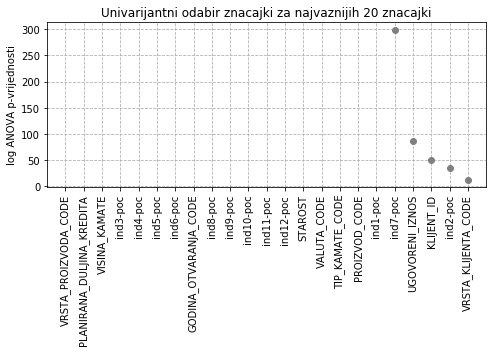

In [69]:
## potrebno napraviti nakon enkodiranja 
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2


train_set, test_set = train_test_split(X, test_size=0.20, random_state=42)

X_train = train_set.drop('PRIJEVREMENI_RASKID',axis=1)
y_train = train_set['PRIJEVREMENI_RASKID']

k_best = 20
selector = SelectKBest(f_classif, k=k_best)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
indices = np.argsort(scores)[::-1] # Vrati indekse koji sortiraju polje (obratno)

plt.figure(figsize=(7,5))

plt.plot(range(X_train.shape[1]), scores[indices], 'o', color='gray')

plt.title('Univarijantni odabir znacajki za najvaznijih 20 znacajki')
plt.ylabel('log ANOVA p-vrijednosti')
plt.xlim([-1, X_train.shape[1]])
plt.xticks(range(X_train.shape[1]), train_set.drop('PRIJEVREMENI_RASKID',axis=1).columns.values[indices], rotation=90)
plt.vlines(k_best-0.5, 0, np.max(scores), color='red', linestyle='--')
plt.grid(True,linestyle='--')
plt.tight_layout()

# Hack za bojanje noise znacajki u crveno
[ i.set_color("red") for i in plt.gca().get_xticklabels() if i.get_text()[:5] == 'noise' ]

plt.show()

C:\Users\Dorotea\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.18854387 0.18496876 0.15660651 0.10162962 0.23796233 0.00158514
 0.00267303 0.00183567 0.00236737 0.00759392 0.00216607 0.00082407
 0.0050914  0.00150271 0.00235281 0.0054034  0.00128916 0.01328021
 0.01987554 0.00686571 0.02134008 0.00238206 0.03186058]


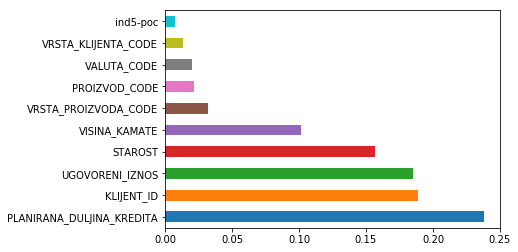

In [81]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = imputed_df.drop(['PRIJEVREMENI_RASKID_CODE'], axis = 1)  #independent columns
y = imputed_df['PRIJEVREMENI_RASKID_CODE']  #target column i.e price range


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

C:\Users\Dorotea\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.30773036 0.19714626 0.10107169 0.26709454 0.00051819 0.00108922
 0.0015002  0.00557143 0.00302367 0.00224301 0.00153441 0.00069407
 0.00144891 0.00300363 0.00886086 0.00139533 0.01190879 0.01560707
 0.00885702 0.0146202  0.00451158 0.04056956]


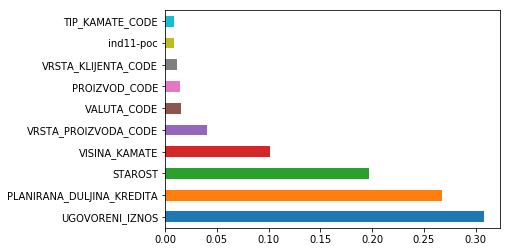

In [82]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = imputed_df.drop(['PRIJEVREMENI_RASKID_CODE', 'KLIJENT_ID'], axis = 1)  #independent columns
y = imputed_df['PRIJEVREMENI_RASKID_CODE']  #target column i.e price range


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

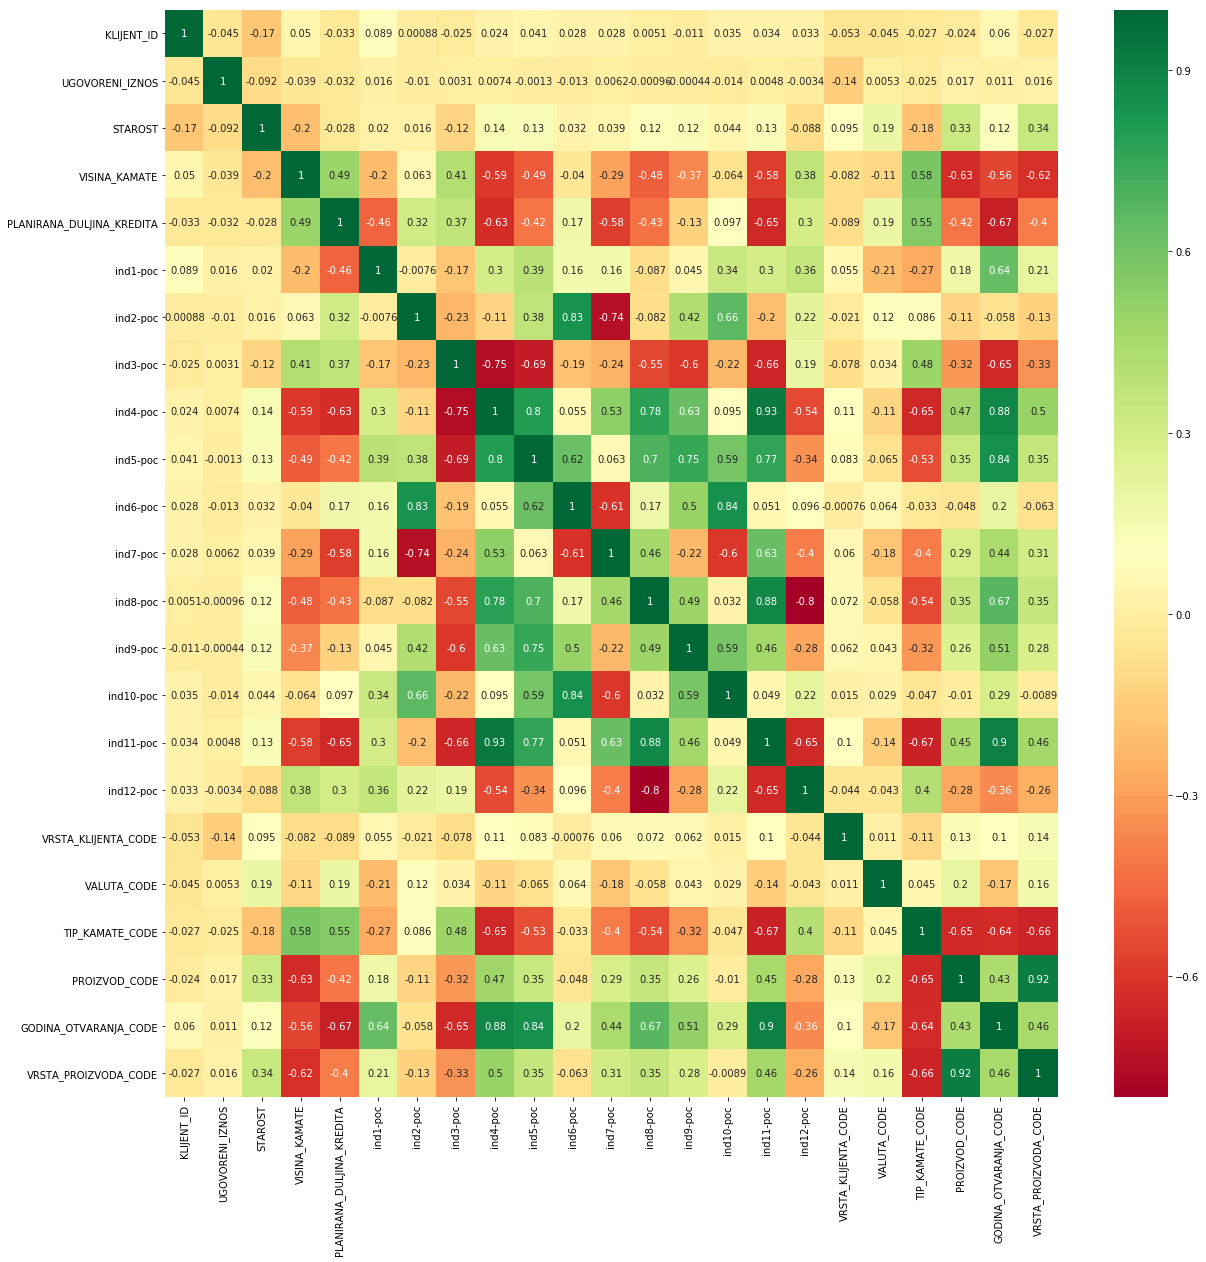

In [85]:
import seaborn as sns
#get correlations of each features in dataset
data = imputed_df.drop(['PRIJEVREMENI_RASKID_CODE'], axis = 1)
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [80]:
X.head()

,KLIJENT_ID,UGOVORENI_IZNOS,STAROST,VISINA_KAMATE,PLANIRANA_DULJINA_KREDITA,ind1-poc,ind2-poc,ind3-poc,ind4-poc,ind5-poc,...,ind9-poc,ind10-poc,ind11-poc,ind12-poc,VRSTA_KLIJENTA_CODE,VALUTA_CODE,TIP_KAMATE_CODE,PROIZVOD_CODE,GODINA_OTVARANJA_CODE,VRSTA_PROIZVODA_CODE
0,1002.0,1035165.83,20.0,9.00,3654.0,10194.012322,5.283652,2.9,-7.139518,39.026244,...,5.365993,-2.443876,37.227243,47.6,1.0,0.0,2.0,22.0,12.0,0.0
1,1002.0,20154791.73,20.0,0.00,141.0,10479.994090,-0.340190,2.3,-0.698502,40.414985,...,5.343508,-7.863033,63.824833,44.8,1.0,2.0,1.0,12.0,16.0,0.0
2,1002.0,2195859.05,20.0,2.10,28.0,10479.994090,-0.340190,2.3,-0.698502,40.414985,...,5.343508,-7.863033,63.824833,44.8,1.0,1.0,0.0,30.0,16.0,1.0
3,1002.0,2210255.99,20.0,2.55,46.0,10479.994090,-0.340190,2.3,-0.698502,40.414985,...,5.343508,-7.863033,63.824833,44.8,1.0,1.0,0.0,30.0,16.0,1.0
4,1002.0,2237031.88,20.0,2.35,30.0,10479.994090,-0.340190,2.3,-0.698502,40.414985,...,5.343508,-7.863033,63.824833,44.8,1.0,1.0,0.0,30.0,16.0,1.0


<h2> Nastavak Eleninog ML modela </h2>

In [39]:
X_train = df_merged[['KLIJENT_ID', 'UGOVORENI_IZNOS', 'VALUTA', 'VRSTA_KLIJENTA', 'PROIZVOD',
       'VRSTA_PROIZVODA', 'TIP_KAMATE', 'STAROST',
       'VISINA_KAMATE', 'PLANIRANA_DULJINA_KREDITA', 'GODINA_OTVARANJA',
       'ind1-poc', 'ind2-poc', 'ind3-poc', 'ind4-poc', 'ind5-poc', 'ind6-poc',
       'ind7-poc', 'ind8-poc', 'ind9-poc', 'ind10-poc', 'ind11-poc',
       'ind12-poc']]

X_test = test_merged[['KLIJENT_ID', 'UGOVORENI_IZNOS', 'VALUTA', 'VRSTA_KLIJENTA', 'PROIZVOD',
       'VRSTA_PROIZVODA', 'TIP_KAMATE', 'STAROST',
       'VISINA_KAMATE', 'PLANIRANA_DULJINA_KREDITA', 'GODINA_OTVARANJA',
       'ind1-poc', 'ind2-poc', 'ind3-poc', 'ind4-poc', 'ind5-poc', 'ind6-poc',
       'ind7-poc', 'ind8-poc', 'ind9-poc', 'ind10-poc', 'ind11-poc',
       'ind12-poc']]

In [40]:
y_train = df_merged['PRIJEVREMENI_RASKID']

In [41]:
y_test = test_merged['PRIJEVREMENI_RASKID']

In [42]:
X_train['train']=1
X_test['train']=0

combined = pd.concat([X_train,X_test])
dumm = pd.get_dummies(combined['VRSTA_PROIZVODA'])
combined = pd.concat([combined,dumm],axis = 1)
dumm = pd.get_dummies(combined['VALUTA'])
combined = pd.concat([combined,dumm],axis = 1)
dumm = pd.get_dummies(combined['TIP_KAMATE'])
combined = pd.concat([combined,dumm],axis = 1)
del combined['VALUTA'];del combined['VRSTA_PROIZVODA'];del combined['TIP_KAMATE'];

C:\Users\Dorotea\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
combined['VRSTA_KLIJENTA_CODE'] = lb_make.fit_transform(combined['VRSTA_KLIJENTA'])

combined['PROIZVOD_CODE'] = lb_make.fit_transform(combined['PROIZVOD'])

combined['GODINA_OTVARANJA_CODE'] = lb_make.fit_transform(combined['GODINA_OTVARANJA'])

del combined['GODINA_OTVARANJA'];del combined['VRSTA_KLIJENTA'];del combined['PROIZVOD'];

# enkodirati i klijent_id

In [44]:
combined.head()

,KLIJENT_ID,UGOVORENI_IZNOS,STAROST,VISINA_KAMATE,PLANIRANA_DULJINA_KREDITA,ind1-poc,ind2-poc,ind3-poc,ind4-poc,ind5-poc,...,3,4,5,A,B,C,D,VRSTA_KLIJENTA_CODE,PROIZVOD_CODE,GODINA_OTVARANJA_CODE
0,1002,1035165.83,20,9.00,3654,10194,5.28365,2.9,-7.13952,39.0262,...,0,0,0,0,0,1,0,1,22,12
1,1002,20154791.73,20,0.00,141,10480,-0.34019,2.3,-0.698502,40.415,...,1,0,0,0,1,0,0,1,12,16
2,1002,2195859.05,20,2.10,28,10480,-0.34019,2.3,-0.698502,40.415,...,0,0,0,1,0,0,0,1,30,16
3,1002,2210255.99,20,2.55,46,10480,-0.34019,2.3,-0.698502,40.415,...,0,0,0,1,0,0,0,1,30,16
4,1002,2237031.88,20,2.35,30,10480,-0.34019,2.3,-0.698502,40.415,...,0,0,0,1,0,0,0,1,30,16


In [45]:
combined['ind1-poc'] = combined['ind1-poc'].astype(float)
combined['ind2-poc'] = combined['ind2-poc'].astype(float)
combined['ind3-poc'] = combined['ind3-poc'].astype(float)
combined.loc[combined['ind4-poc'] == '-','ind4-poc'] = np.nan
combined.loc[combined['ind5-poc'] == '-','ind5-poc'] = np.nan
combined.loc[combined['ind6-poc'] == '-','ind6-poc'] = np.nan
combined.loc[combined['ind10-poc'] == '-','ind10-poc'] = np.nan
combined.loc[combined['ind11-poc'] == '-','ind11-poc'] = np.nan
combined.loc[combined['ind12-poc'] == '-','ind12-poc'] = np.nan
combined['ind4-poc'] = combined['ind4-poc'].astype(float)
combined['ind5-poc'] = combined['ind5-poc'].astype(float)
combined['ind6-poc'] = combined['ind6-poc'].astype(float)
#combined['ind10-poc'] = combined['ind10-poc'].astype(float)
combined['ind11-poc'] = combined['ind11-poc'].astype(float)
combined['ind12-poc'] = combined['ind12-poc'].astype(float)
combined.loc[combined['ind10-poc'] == '....','ind10-poc'] = np.nan
combined['ind10-poc'] = combined['ind10-poc'].astype(float)
combined['ind7-poc'] = combined['ind7-poc'].astype(float)
combined['ind8-poc'] = combined['ind8-poc'].astype(float)
combined['ind9-poc'] = combined['ind9-poc'].astype(float)

In [46]:
y_train = lb_make.fit_transform(y_train)
X_train = combined[combined['train']==1]
X_test = combined[combined['train']==0]
X_train.drop(['train'],axis=1,inplace=True)
X_test.drop(['train'],axis=1,inplace=True)

C:\Users\Dorotea\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [47]:
from sklearn.preprocessing import Imputer
# Create an imputer object that looks for 'Nan' values, then replaces them with the mean value of the feature by columns (axis=0)
mean_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)

# Train the imputor on the df dataset
imputed_df = pd.DataFrame(mean_imputer.fit_transform(X_train))
imputed_df.columns = X_train.columns
imputed_df.index = X_train.index

X_train = imputed_df
# Train the imputor on the df dataset
imputed_df1 = pd.DataFrame(mean_imputer.fit_transform(X_test))
imputed_df1.columns = X_test.columns
imputed_df1.index = X_test.index

X_test=imputed_df1

C:\Users\Dorotea\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [48]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=12)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

y_test = y_pred

student = pd.read_excel('eval_dataset_nan.xlsx')
y_test = np.where(y_test==0,'N', 'Y')

student['PRIJEVREMENI_RASKID'] = y_test

student.to_csv('student.csv')

<h3> S normalizacijom </h3>

In [49]:
from sklearn import preprocessing

x = X_train.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
new_X_train = pd.DataFrame(x_scaled)

In [50]:
new_X_train.columns = X_train.columns
new_X_train.index = X_train.index

In [51]:
X_train = new_X_train

In [52]:
x = X_test.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
new_X_test = pd.DataFrame(x_scaled)

In [53]:
new_X_test.columns = X_test.columns
new_X_test.index = X_test.index

In [54]:
X_test = new_X_test

In [55]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [56]:
y_test = y_pred
y_test = np.where(y_test==0,'N', 'Y')
student['PRIJEVREMENI_RASKID'] = y_test
student.to_csv('student.csv')

<h3> Hyperparameter tuning </h3>

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

In [58]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
##rf_random.fit(train_features, train_labels)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
# We can view the best parameters from fitting the random search:
rf_random.best_params_

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(train_features, train_labels)
base_accuracy = evaluate(base_model, test_features, test_labels)
#Model Performance
#Average Error: 3.9199 degrees.
#Accuracy = 93.36%.


In [ ]:
test_features = X_train
test_labels = y_train

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test_features, test_labels)
#Model Performance
#Average Error: 3.7152 degrees.
#Accuracy = 93.73%.


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
#Improvement of 0.40%.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train_features, train_labels)
grid_search.best_params_
{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test_features, test_labels)
#Model Performance
#Average Error: 3.6561 degrees.
#Accuracy = 93.83%.
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))
#Improvement of 0.50%.

<h2> XGBoost </h2>

https://www.datacamp.com/community/tutorials/xgboost-in-python
    # missing values: 
    https://github.com/dmlc/xgboost/issues/21

In [41]:
!pip install xgboost

In [42]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
#import pandas as pd
#import numpy as np

In [44]:
X=X_train
y=y_train

In [49]:
X.columns.tolist()

['KLIJENT_ID',
 'UGOVORENI_IZNOS',
 'STAROST',
 'VISINA_KAMATE',
 'PLANIRANA_DULJINA_KREDITA',
 'ind1-poc',
 'ind2-poc',
 'ind3-poc',
 'ind4-poc',
 'ind5-poc',
 'ind6-poc',
 'ind7-poc',
 'ind8-poc',
 'ind9-poc',
 'ind10-poc',
 'ind11-poc',
 'ind12-poc',
 'A',
 'L',
 1,
 2,
 3,
 4,
 5,
 'A',
 'B',
 'C',
 'D',
 'VRSTA_KLIJENTA_CODE',
 'PROIZVOD_CODE',
 'GODINA_OTVARANJA_CODE']

In [45]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

ValueError: feature_names must be unique

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [ ]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

## ili neka druga metrika kao gore

<h4> k-fold Cross Validation using XGBoost </h4>

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [ ]:
cv_results.head()

In [ ]:
print((cv_results["test-rmse-mean"]).tail(1))

<h4> Vizualizacija znacajki</h4>

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e
https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

<h2> Odabir znacajki </h2>

In [51]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(X, test_size=0.20, random_state=42)

X_train = train_set.drop('PRIJEVREMENI_RASKID',axis=1)
y_train = train_set['PRIJEVREMENI_RASKID']

k_best = 20
selector = SelectKBest(f_classif, k=k_best)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
indices = np.argsort(scores)[::-1] # Vrati indekse koji sortiraju polje (obratno)

plt.figure(figsize=(7,5))

plt.plot(range(X_train.shape[1]), scores[indices], 'o', color='gray')

plt.title('Univarijantni odabir znacajki za najvaznijih 20 znacajki')
plt.ylabel('log ANOVA p-vrijednosti')
plt.xlim([-1, X_train.shape[1]])
plt.xticks(range(X_train.shape[1]), train_set.drop('target',axis=1).columns.values[indices], rotation=90)
plt.vlines(k_best-0.5, 0, np.max(scores), color='red', linestyle='--')
plt.grid(True,linestyle='--')
plt.tight_layout()

# Hack za bojanje noise znacajki u crveno
[ i.set_color("red") for i in plt.gca().get_xticklabels() if i.get_text()[:5] == 'noise' ]

plt.show()

KeyError: "['PRIJEVREMENI_RASKID'] not found in axis"

In [52]:
X.head()

,KLIJENT_ID,UGOVORENI_IZNOS,STAROST,VISINA_KAMATE,PLANIRANA_DULJINA_KREDITA,ind1-poc,ind2-poc,ind3-poc,ind4-poc,ind5-poc,...,3,4,5,A,B,C,D,VRSTA_KLIJENTA_CODE,PROIZVOD_CODE,GODINA_OTVARANJA_CODE
0,0.0,0.001817,0.190476,0.125049,0.498635,0.669412,0.976886,0.555556,0.123303,0.26974,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.083333,0.733333,0.521739
1,0.0,0.035383,0.190476,0.000056,0.019241,0.708807,0.540002,0.472222,0.607488,0.35257,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.083333,0.400000,0.695652
2,0.0,0.003855,0.190476,0.029221,0.003821,0.708807,0.540002,0.472222,0.607488,0.35257,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.083333,1.000000,0.695652
3,0.0,0.003880,0.190476,0.035470,0.006277,0.708807,0.540002,0.472222,0.607488,0.35257,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.083333,1.000000,0.695652
4,0.0,0.003927,0.190476,0.032693,0.004094,0.708807,0.540002,0.472222,0.607488,0.35257,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.083333,1.000000,0.695652
